# Task 4.9 Part 2

In [7]:
# Import libraries
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy

In [8]:
# Import path
path = r'/Users/hannahstrassmann/Desktop/Achievment four Project/two Data'

In [9]:
# Import datafram
df_opc_merged = pd.read_pickle(os.path.join(path, 'Prepared Data', 'opc_merged.pkl'))

In [10]:
# Checking df
df_opc_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,busiest_period_of_day_2,First Name,Surnam,Gender,State,Age,date_joined,number_of_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,average orders 2,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,average orders 2,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,average orders 2,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,average orders 2,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,average orders 2,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [11]:
# Correcting small oversight: Changing STATE to State
df_opc_merged.rename(columns = {'STATE' : 'State'}, inplace = True)

In [12]:
df_opc_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,busiest_period_of_day_2,First Name,Surnam,Gender,State,Age,date_joined,number_of_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,average orders 2,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,average orders 2,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,average orders 2,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,average orders 2,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,average orders 2,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


Histogram

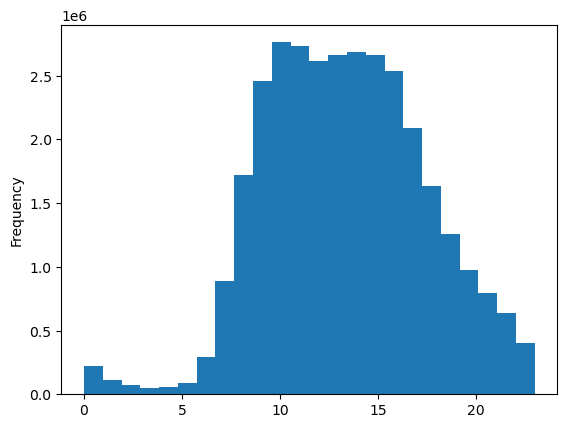

In [14]:
# Creating a histogram of order_time
Histrogram_order_times = df_opc_merged['order_time'].plot.hist(bins = 24)

This histogram demonstrates that there are the most sales between 8am and 4pm.

Creating a bar chart

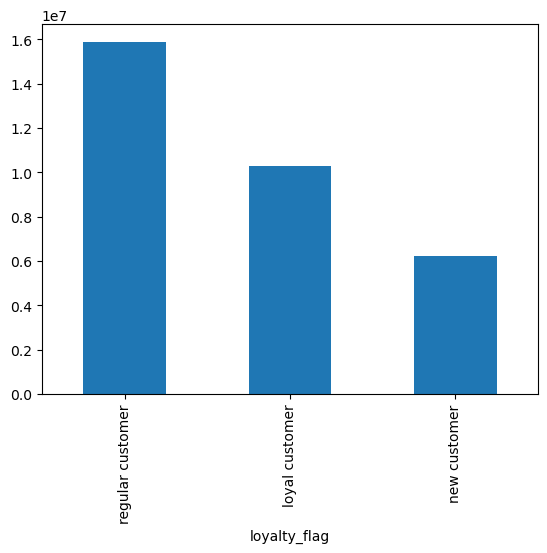

In [17]:
# Creating bar chart for loyalty_flag
bar_loyalty_flag = df_opc_merged['loyalty_flag'].value_counts().plot.bar()

Creating a sample of the data to make line chart and scatterplot

In [19]:
# Creating Sample of Data
np.random.seed(4)
dev = np.random.rand(len(df_opc_merged)) <= 0.7

In [20]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [21]:
# Store 70%/30% in df big/small
big = df_opc_merged[dev]
small = df_opc_merged[~dev]

In [22]:
len(df_opc_merged)

32404859

In [23]:
len(big) + len(small)

32404859

In [24]:
df_opc_ness_col =small[['order_time', 'prices']]

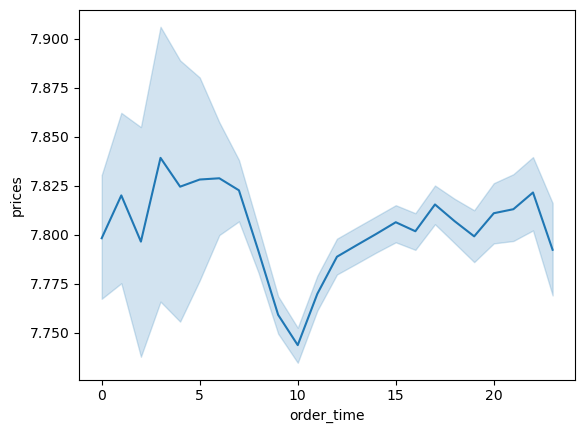

In [25]:
# Line chart for order_time and prices
line_price_ot = sns.lineplot(data = df_opc_ness_col, x = 'order_time', y = 'prices')

In [26]:
df_opc_ness_col_2 =small[['number_of_dependants', 'Age']]

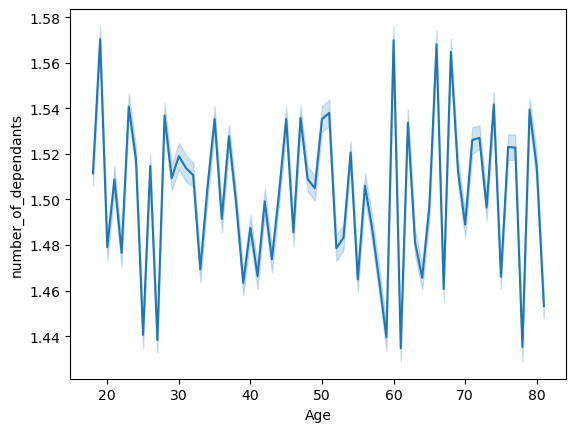

In [27]:
# Line chart for Age and number_of_dependants
line_age_nod = sns.lineplot (data = df_opc_ness_col_2, x = 'Age', y = 'number_of_dependants')

It doesn't tell me much except that there is no strong rlationship between age and number of dependants. It seems that around 60yoa people have both a lot but also vwery few dependants.

In [29]:
df_opc_ness_col_3 =small[['income', 'Age']]

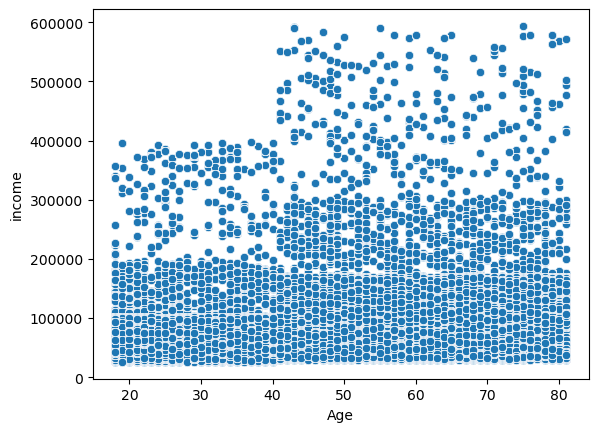

In [30]:
# Scatterplot for Age and income
scatter_age_income = sns.scatterplot (x = 'Age', y = 'income', data = df_opc_ness_col_3)

the scatterplot shows that income rises at 40 y.o.a.. before 40 y.o.a. there is no one with an income over 40 thousand. At 40 y.o.a. there are also much more people with an income over 20 thousand compared to before.

In [32]:
# Export df
df_opc_merged.to_pickle(os.path.join(path,'Prepared Data', 'opc_merged.pkl'))

In [33]:
# Import path for figure export
path_2 = r'/Users/hannahstrassmann/Desktop/Achievment four Project/04 Analysis'

In [34]:
Histrogram_order_times.figure.savefig (os.path.join(path_2, 'Visualisations', 'Histrogram_order_times.png'))

In [35]:
bar_loyalty_flag.figure.savefig (os.path.join(path_2, 'Visualisations', 'bar_loyalty_flag.png'))

In [36]:
line_price_ot.figure.savefig (os.path.join(path_2, 'Visualisations', 'line_price_ot.png'))

In [37]:
line_age_nod.figure.savefig (os.path.join(path_2, 'Visualisations', 'line_age_nod.png'))

In [38]:
scatter_age_income.figure.savefig (os.path.join(path_2, 'Visualisations', 'scatter_age_income.png'))